In [102]:
import sys
sys.path.append("..")

import time
import pandas as pd
import matplotlib.pyplot as plt

from datasets.custom_dataset import CustomDataset

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision.transforms import Compose, Grayscale, ToPILImage, ToTensor, Normalize, CenterCrop, RandomAdjustSharpness

from torchmetrics.classification import MulticlassAccuracy
from torchmetrics.classification import MulticlassPrecision
from torchmetrics.classification import MulticlassRecall
from torchmetrics.classification import MulticlassF1Score
from torchmetrics.classification import MulticlassROC
from torchmetrics.classification import MulticlassAUROC

from sklearn.model_selection import train_test_split

# Carga del set de datos

## Directorios

In [103]:
dataset_path = '../datasets/dataset.csv'
images_path = '../datasets/dataset_images'

dataset = pd.read_csv(dataset_path)
dataset_file_names = dataset['file_name']
dataset_labels = dataset['label']

dataset.sample(5).head()

,file_name,label
40864,Soybean_healthy_40864.jpg,18
47919,Tomato_healthy_47919.jpg,21
6167,Orange_diseased_6167.jpg,3
48570,Tomato_healthy_48570.jpg,21
15803,Pepper_healthy_15803.jpg,8


## Distribución de las clases en el set de datos

In [104]:
class_ids = {
    0: 'no-leaf',
    1: 'squash-diseased',
    2: 'apple-healthy',
    3: 'orange-diseased',
    4: 'tomato-diseased',
    5: 'grape-diseased',
    6: 'blueberry-healthy',
    7: 'grape-healthy',
    8: 'pepper-healthy',
    9: 'strawberry-diseased',
    10: 'potato-healthy',
    11: 'raspberry-healthy',
    12: 'pepper-diseased',
    13: 'cherry-healthy',
    14: 'strawberry-healthy',
    15: 'corn-diseased',
    16: 'corn-healthy',
    17: 'potato-diseased',
    18: 'soybean-healthy',
    19: 'peach-healthy',
    20: 'apple-diseased',
    21: 'tomato-healthy',
    22: 'peach-diseased',
    23: 'cherry-diseased'
}

def count_dataset_classes(labels, class_ids):
    class_count = {}
    
    for label in labels:
        if(class_ids[label] not in class_count):
            class_count[class_ids[label]] = 1
        else:
            class_count[class_ids[label]] += 1
            
    return class_count

<Axes: title={'center': 'Distribución de clases en el dataset'}, xlabel='class'>

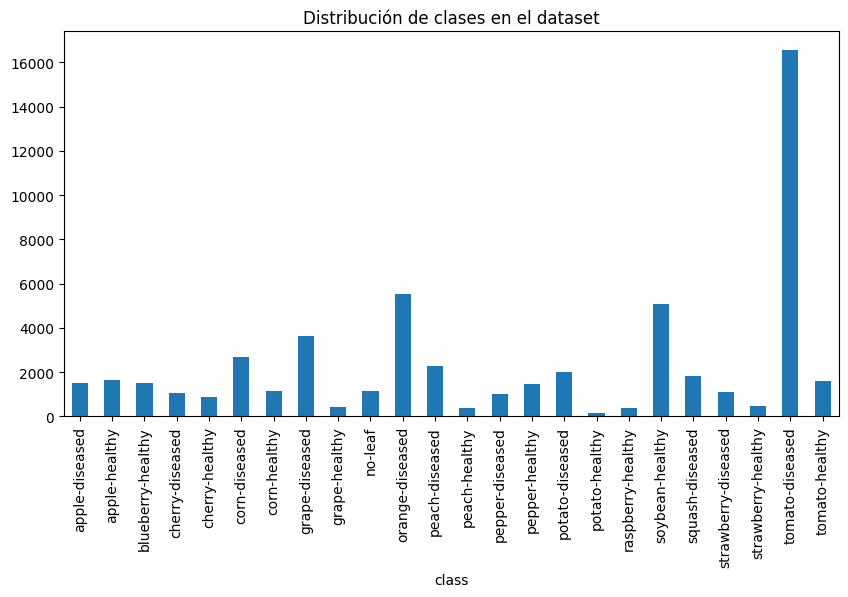

In [105]:
dataset_class_count = count_dataset_classes(dataset_labels, class_ids)
dataset_class_count = {
    'class': list(dataset_class_count.keys()),
    'count': list(dataset_class_count.values())
}

df = pd.DataFrame.from_dict(dataset_class_count)
df.sort_values(by=['class'], inplace=True)
df.index = df['class']
df.plot(kind='bar', title='Distribución de clases en el dataset', legend=False, figsize=(10, 5))

## División del set de datos

### Set para la ejecución #1

In [106]:
X_encoder_1, X_classifier_1, y_encoder_1, y_classifier_1 = train_test_split(
    dataset_file_names, dataset_labels, train_size=0.8, random_state=420, stratify=dataset_labels)

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    X_classifier_1, y_classifier_1, train_size=0.5, random_state=420, stratify=y_classifier_1)

print('Datos para el encoder', X_encoder_1.shape)
print('Datos para el clasificador:', X_classifier_1.shape)

print('\tDatos de entrenamiento para el clasificador:', X_train_1.shape)
print('\tDatos de prueba para el clasificador:', X_test_1.shape)


Datos para el encoder (44358,)
Datos para el clasificador: (11090,)
	Datos de entrenamiento para el clasificador: (5545,)
	Datos de prueba para el clasificador: (5545,)


### Set para la ejecución #2

In [107]:
X_encoder_2, X_classifier_2, y_encoder_2, y_classifier_2 = train_test_split(
    dataset_file_names, dataset_labels, train_size=0.5, random_state=204, stratify=dataset_labels)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X_classifier_2, y_classifier_2, train_size=0.8, random_state=204, stratify=y_classifier_2)

print('Datos para el encoder', X_encoder_2.shape)
print('Datos para el clasificador:', X_classifier_2.shape)

print('\tDatos de entrenamiento para el clasificador:', X_train_2.shape)
print('\tDatos de prueba para el clasificador:', X_test_2.shape)


Datos para el encoder (27724,)
Datos para el clasificador: (27724,)
	Datos de entrenamiento para el clasificador: (22179,)
	Datos de prueba para el clasificador: (5545,)


## Uso de GPU si está disponible

In [108]:
device = ("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

Using cpu device
